In [2]:
# Loading important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [3]:
# Loading the dataset
df = pd.read_csv('shootings_2018.csv')
df.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [4]:
# Removing column display limit
pd.set_option('display.max_columns', None)

In [5]:
# Seeing the number of columns and rows
df.shape

(322, 6)

In [6]:
# Using info function to see the data types of the dataet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         322 non-null    object
 1   State        322 non-null    object
 2   Dead         322 non-null    int64 
 3   Injured      322 non-null    int64 
 4   Total        322 non-null    int64 
 5   Description  322 non-null    object
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [7]:
# To check if there are null values.
df.isna().sum()

Date           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [8]:
# To see the frequency of each Value in the State column
df['State'].value_counts()

Illinois                34
California              33
Florida                 28
Pennsylvania            18
Tennessee               17
Texas                   15
Missouri                14
Louisiana               12
Alabama                 12
New York                11
Ohio                    11
North Carolina          11
Michigan                 9
New Jersey               9
Indiana                  8
Maryland                 8
Georgia                  7
Colorado                 7
Arkansas                 5
District of Columbia     5
Oklahoma                 5
Virginia                 4
South Carolina           4
Kentucky                 4
Wisconsin                4
Nevada                   4
Washington               3
Arizona                  3
Nebraska                 3
Mississippi              3
Minnesota                2
Connecticut              2
Kansas                   2
New Mexico               2
Delaware                 1
Massachusetts            1
Utah                     1
N

In [9]:
# A statistical summary of the dataset
df.describe()

,Dead,Injured,Total
count,322.000000,322.000000,322.000000
mean,1.189441,4.009317,5.195652
std,1.916841,2.300597,2.983169
min,0.000000,0.000000,4.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,2.000000,5.000000,5.000000
max,17.000000,22.000000,34.000000


# Begining of dataset wrangling

In [10]:
# Showing the first five rows of the dataset
df.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [11]:
# Making a copy of the dataset for Exploratory Data Analysis after the Regression analysis
df1 = df[:]

In [12]:
# Extracting the Year and Month columns from the Date Column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [13]:
# Enconding the State "Variable" : Note: I intended to use the state column but later dropped it as seen below.
new_df  = pd.get_dummies(df, columns=['State'], drop_first = True)

In [14]:

new_df.head(3)

,Date,Dead,Injured,Total,Description,Year,Month,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Illinois,State_Indiana,State_Kansas,State_Kentucky,State_Louisiana,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Nebraska,State_Nevada,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_Ohio,State_Oklahoma,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Utah,State_Virginia,State_Washington,State_Wisconsin
0,31/12/2018,3,2,5,A dispute began at a rented Airbnb during a Ne...,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,29/12/2018,1,3,4,One person was killed and three people were wo...,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28/12/2018,4,1,5,"A gunman shot and killed his girlfriend, her t...",2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Showing the first 3 rows of the new and encoded data set
new_df.head()

,Date,Dead,Injured,Total,Description,Year,Month,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Illinois,State_Indiana,State_Kansas,State_Kentucky,State_Louisiana,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Nebraska,State_Nevada,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_Ohio,State_Oklahoma,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Utah,State_Virginia,State_Washington,State_Wisconsin
0,31/12/2018,3,2,5,A dispute began at a rented Airbnb during a Ne...,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,29/12/2018,1,3,4,One person was killed and three people were wo...,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28/12/2018,4,1,5,"A gunman shot and killed his girlfriend, her t...",2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24/12/2018,2,2,4,Three people were killed and two others were w...,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23/12/2018,0,7,7,Seven people were wounded during a shooting at...,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Droping the Encoded State columns
new_df.drop(columns= ['State_Arizona','State_Arkansas','State_California','State_Colorado','State_Connecticut','State_Delaware','State_District of Columbia','State_Florida','State_Georgia','State_Illinois','State_Indiana','State_Kansas','State_Kentucky','State_Louisiana','State_Maryland','State_Massachusetts','State_Michigan','State_Minnesota','State_Mississippi','State_Missouri','State_Nebraska','State_Nevada','State_New Jersey','State_New Mexico','State_New York','State_North Carolina','State_Ohio','State_Oklahoma','State_Pennsylvania','State_South Carolina','State_Tennessee','State_Texas','State_Utah','State_Virginia','State_Washington','State_Wisconsin'], inplace = True)

In [17]:
# Droping the Date and Description Columns
new_df.drop(columns = ['Date', 'Description'], inplace = True)

In [18]:
new_df.head(3)

,Dead,Injured,Total,Year,Month
0,3,2,5,2018,12
1,1,3,4,2018,12
2,4,1,5,2018,12


<AxesSubplot:>

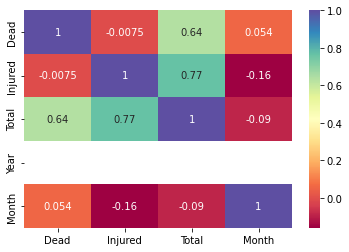

In [19]:
# Plotting correlation of relevant variables.
sns.heatmap(new_df.corr().drop(columns = 'Year'), annot = True, cmap = 'Spectral')

In [20]:
# Segmenting the independent and dependent variables
x = new_df.drop('Total', axis = True)
y = new_df['Total']

In [21]:
# Training model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
# Running the Linear Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(x_test)

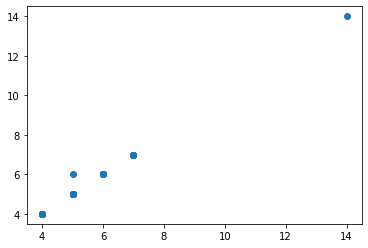

In [25]:
plt.scatter(y_test, y_pred)

In [26]:
# The regression coeficient
reg.coef_

array([ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, -1.72761807e-16])

In [27]:
# Regression intercept
reg.intercept_

1.7763568394002505e-15

In [28]:
# Testing the R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9930851063829788

In [64]:
y_pred

array([ 4.,  7.,  4.,  4.,  4.,  4.,  7.,  6.,  7.,  4.,  4.,  4.,  4.,
        5.,  5.,  4.,  7.,  6.,  4.,  4.,  6.,  5.,  4.,  4.,  6.,  4.,
        4.,  6.,  4.,  6.,  4.,  4.,  4.,  5.,  5.,  4.,  5.,  6.,  5.,
        5.,  5.,  4.,  4.,  6.,  7.,  4., 14.,  4.,  7.,  4.,  5.,  5.,
        4.,  5.,  5.,  5.,  4.,  4.,  4.,  5.,  5.,  5.,  4.,  4.,  4.])

In [63]:
y_test

173    4
132    7
197    4
9      4
104    4
      ..
229    5
60     5
244    4
261    4
118    4
Name: Total, Length: 65, dtype: int64

In [81]:
## Making the Predictions
Dead = int(input("Dead: "))
Injured = int(input("Injured: "))
Year = int(input("Year: "))
Month = int(input("Month: "))

output = reg.predict([[Dead,Injured,Year,Month]])
print(output)

Dead: 23
Injured: 23
Year: 2021
Month: 6
[46.]


In [81]:
from pandas import DataFrame

In [83]:
Death_prediction = {'Dead': [20,16,10,50,44,90,45,90,34,27,16,74,38,16,22],
                   'Injured': [12,34,65,23,78,34,12,20,68,9,45,67,12,31,23],
                   'Year': [2010,2011,2012,2013,2018,2019,2017,2018,2022,2021,2020,2013,2006,2004,2024],
                   'Month': [10,9,4,5,7,8,12,11,3,7,9,6,8,4,7]}

In [84]:
ddf = DataFrame(Death_prediction, columns = ['Dead', 'Injured', 'Year', 'Month'])
ddf

,Dead,Injured,Year,Month
0,20,12,2010,10
1,16,34,2011,9
2,10,65,2012,4
3,50,23,2013,5
4,44,78,2018,7
5,90,34,2019,8
6,45,12,2017,12
7,90,20,2018,11
8,34,68,2022,3
9,27,9,2021,7


In [85]:
y_pred = reg.predict(ddf)
y_pred

array([ 32.,  50.,  75.,  73., 122., 124.,  57., 110., 102.,  36.,  61.,
       141.,  50.,  47.,  45.])

In [86]:
ddf['Predicted Casualty'] = y_pred
ddf

,Dead,Injured,Year,Month,Predicted Casualty
0,20,12,2010,10,32.0
1,16,34,2011,9,50.0
2,10,65,2012,4,75.0
3,50,23,2013,5,73.0
4,44,78,2018,7,122.0
5,90,34,2019,8,124.0
6,45,12,2017,12,57.0
7,90,20,2018,11,110.0
8,34,68,2022,3,102.0
9,27,9,2021,7,36.0


In [87]:
ddf.to_csv('US_Shooting_Predicted_Deaths.csv')

In [29]:
df

,Date,State,Dead,Injured,Total,Description,Year,Month
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...,2018,12
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...,2018,12
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t...",2018,12
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...,2018,12
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...,2018,12
...,...,...,...,...,...,...,...,...
317,07/01/2018,Alabama,1,5,6,A shooting on US Highway 29 led to the shootin...,2018,7
318,07/01/2018,Florida,0,4,4,Four people were wounded while leaving a priva...,2018,7
319,05/01/2018,Mississippi,0,6,6,Six people were wounded in a drive-by shooting...,2018,5
320,04/01/2018,Arkansas,1,3,4,A 33-year-old was killed and three others woun...,2018,4


In [ ]:
# The next Exploratory Data Analysis relies on another but complete dataset on Mass shooting in the USA.

In [30]:
df2 = pd.read_excel('Mother Jones - Mass Shootings Database, 1982 - 2019.xlsx')

In [31]:
df2.head(3)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2022-02-28,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,https://www.nytimes.com/2022/02/28/us/church-s...,-,-,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",2021-11-30,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,https://www.washingtonpost.com/nation/2021/11/...,-,-,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",2021-05-26,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",-,-,semiautomatic handguns,-,-,M,https://www.sfchronicle.com/crime/article/Mass...,https://www.nytimes.com/2021/05/26/us/what-hap...,-,37.316097,-121.888533,Mass,2021


In [32]:
# Capitalize Dataframe column names.
df2.columns = map(str.capitalize, df2.columns)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Case                              126 non-null    object        
 1   Location                          126 non-null    object        
 2   Date                              126 non-null    datetime64[ns]
 3   Summary                           126 non-null    object        
 4   Fatalities                        126 non-null    int64         
 5   Injured                           126 non-null    int64         
 6   Total_victims                     126 non-null    int64         
 7   Location.1                        126 non-null    object        
 8   Age_of_shooter                    126 non-null    object        
 9   Prior_signs_mental_health_issues  126 non-null    object        
 10  Mental_health_details             126 non-null    

In [34]:
df2.describe()

,Fatalities,Injured,Total_victims,Latitude,Longitude,Year
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,7.968254,11.579365,19.547619,37.384370,-96.842004,2008.968254
std,7.721074,49.099630,54.514234,5.623364,17.913985,10.562527
min,3.000000,0.000000,3.000000,21.320063,-157.876462,1982.000000
25%,4.000000,1.000000,6.250000,33.799701,-117.555742,2000.250000
50%,6.000000,3.000000,10.000000,38.323367,-90.874832,2013.000000
75%,8.750000,10.000000,17.000000,41.468409,-81.507765,2017.000000
max,58.000000,546.000000,604.000000,48.461367,-71.075913,2022.000000


In [35]:
df2.corr()

,Fatalities,Injured,Total_victims,Latitude,Longitude,Year
Fatalities,1.000000,0.661317,0.737266,-0.204248,0.022313,-0.017277
Injured,0.661317,1.000000,0.994340,-0.052412,-0.105125,0.050385
Total_victims,0.737266,0.994340,1.000000,-0.076135,-0.091523,0.042934
Latitude,-0.204248,-0.052412,-0.076135,1.000000,-0.063901,0.103112
Longitude,0.022313,-0.105125,-0.091523,-0.063901,1.000000,0.004830
Year,-0.017277,0.050385,0.042934,0.103112,0.004830,1.000000


<AxesSubplot:>

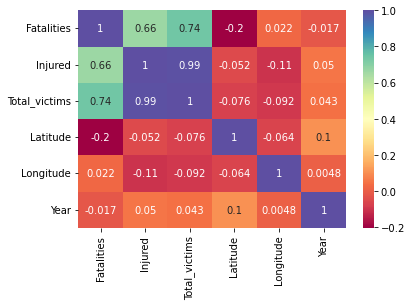

In [36]:
sns.heatmap(df2.corr(), annot  = True, cmap = "Spectral")

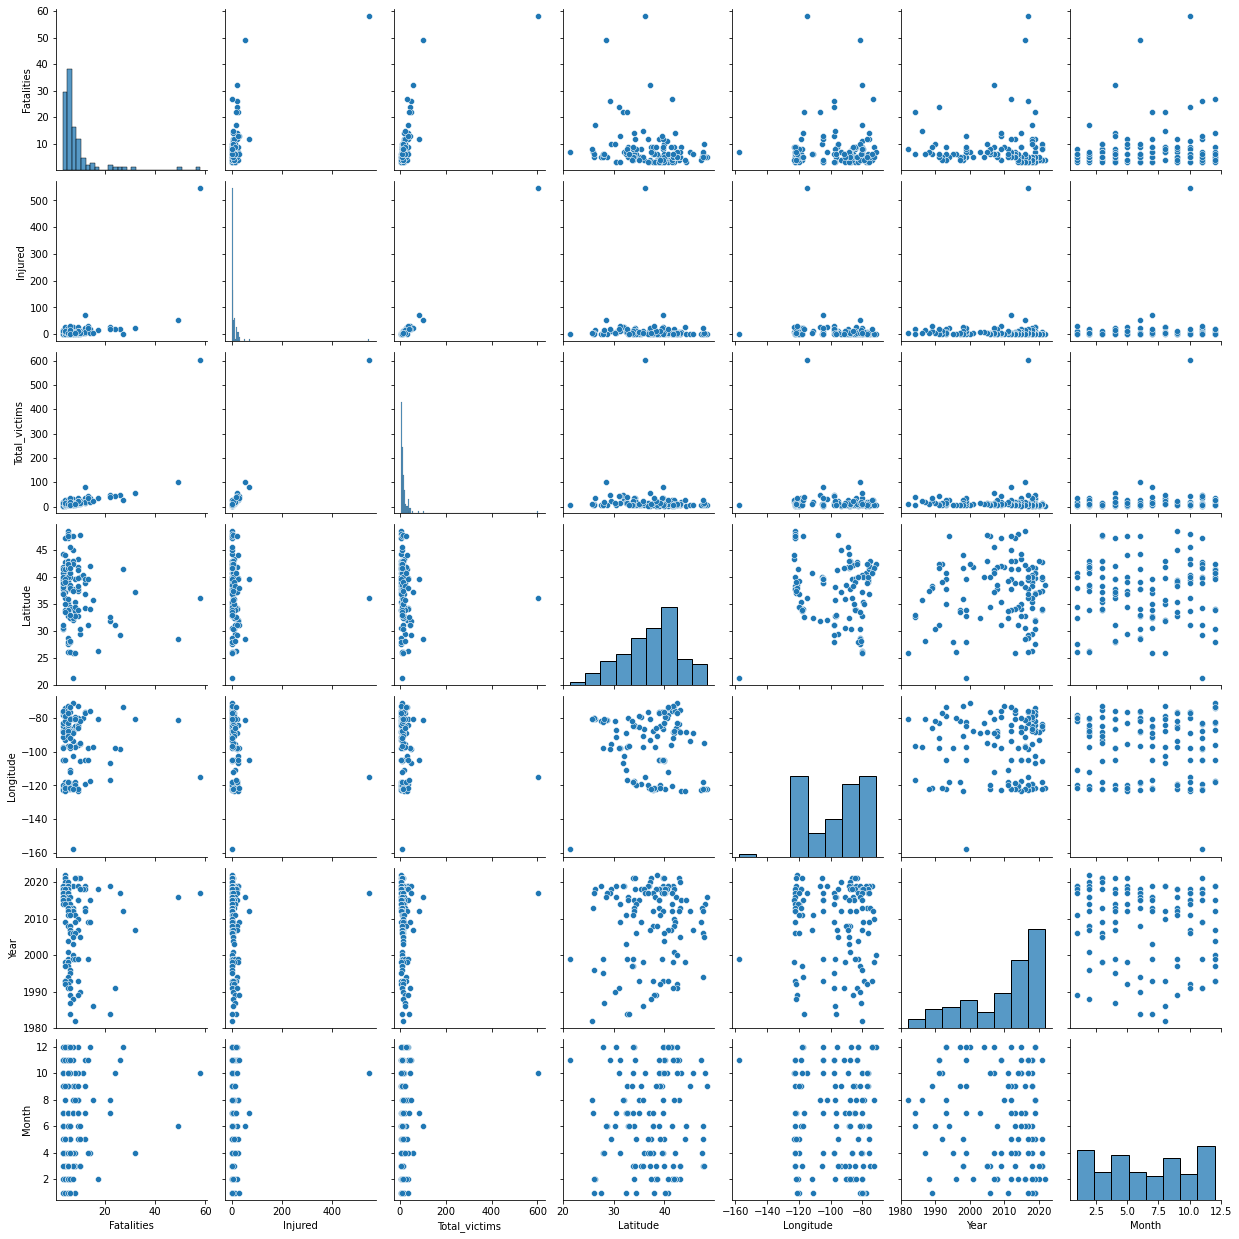

In [88]:
sns.pairplot(df2)

In [37]:
df2.isna().sum()

Case                                0
Location                            0
Date                                0
Summary                             0
Fatalities                          0
Injured                             0
Total_victims                       0
Location.1                          0
Age_of_shooter                      0
Prior_signs_mental_health_issues    0
Mental_health_details               0
Weapons_obtained_legally            0
Where_obtained                      0
Weapon_type                         0
Weapon_details                      0
Race                                0
Gender                              0
Sources                             0
Mental_health_sources               0
Sources_additional_age              0
Latitude                            0
Longitude                           0
Type                                0
Year                                0
dtype: int64

In [38]:
df2.columns

Index(['Case', 'Location', 'Date', 'Summary', 'Fatalities', 'Injured',
       'Total_victims', 'Location.1', 'Age_of_shooter',
       'Prior_signs_mental_health_issues', 'Mental_health_details',
       'Weapons_obtained_legally', 'Where_obtained', 'Weapon_type',
       'Weapon_details', 'Race', 'Gender', 'Sources', 'Mental_health_sources',
       'Sources_additional_age', 'Latitude', 'Longitude', 'Type', 'Year'],
      dtype='object')

In [39]:
df2.shape

(126, 24)

In [40]:
df2.drop(columns = ['Sources','Mental_health_sources','Sources_additional_age'], inplace = True)

In [41]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month

In [42]:
df2.head(3)

,Case,Location,Date,Summary,Fatalities,Injured,Total_victims,Location.1,Age_of_shooter,Prior_signs_mental_health_issues,Mental_health_details,Weapons_obtained_legally,Where_obtained,Weapon_type,Weapon_details,Race,Gender,Latitude,Longitude,Type,Year,Month
0,Sacramento County church shooting,"Sacramento, California",2022-02-28,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,38.601110,-121.418966,Mass,2022,2
1,Oxford High School shooting,"Oxford, Michigan",2021-11-30,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,42.844108,-83.259928,Mass,2021,11
2,San Jose VTA shooting,"San Jose, California",2021-05-26,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",-,-,semiautomatic handguns,-,-,M,37.316097,-121.888533,Mass,2021,5


In [43]:
t_plot  = df2[['Total_victims', 'Year']]

In [44]:
t_plot

,Total_victims,Year
0,4,2022
1,11,2021
2,9,2021
3,15,2021
4,5,2021
...,...,...
121,20,1987
122,21,1986
123,41,1984
124,7,1984


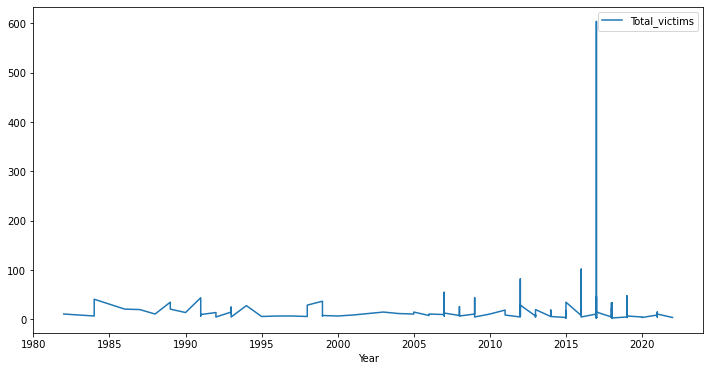

In [45]:
t_plot.plot( 'Year' , 'Total_victims', figsize = (12,6))
plt.show()


<AxesSubplot:xlabel='Year'>

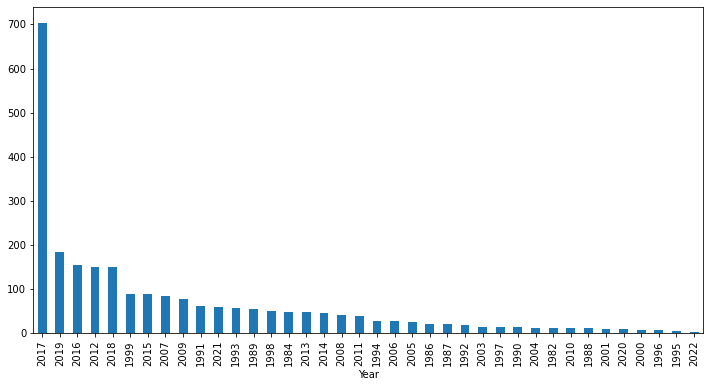

In [46]:
df2.groupby('Year').sum()['Total_victims'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6))

In [47]:
df2.head(2)

,Case,Location,Date,Summary,Fatalities,Injured,Total_victims,Location.1,Age_of_shooter,Prior_signs_mental_health_issues,Mental_health_details,Weapons_obtained_legally,Where_obtained,Weapon_type,Weapon_details,Race,Gender,Latitude,Longitude,Type,Year,Month
0,Sacramento County church shooting,"Sacramento, California",2022-02-28,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,38.601110,-121.418966,Mass,2022,2
1,Oxford High School shooting,"Oxford, Michigan",2021-11-30,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,42.844108,-83.259928,Mass,2021,11


In [48]:
df2['Total_victims'].sum()

2463

In [49]:
df2['Fatalities'].sum()

1004

In [50]:
df2['Injured'].sum()

1459

In [51]:
df2['Case'].value_counts().sort_values(ascending = False)

Sacramento County church shooting             1
Virginia Beach municipal building shooting    1
FedEx warehouse shooting                      1
Orange office complex shooting                1
Boulder supermarket shooting                  1
                                             ..
Shopping centers spree killings               1
United States Postal Service shooting         1
San Ysidro McDonald's massacre                1
Dallas nightclub shooting                     1
Welding shop shooting                         1
Name: Case, Length: 126, dtype: int64

In [52]:
df2.groupby(['Location']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Location
Las Vegas, Nevada             604
Orlando, Florida              107
Aurora, Colorado               87
Fort Hood, Texas               59
Blacksburg, Virginia           55
El Paso, Texas                 48
Sutherland Springs, Texas      46
Killeen, Texas                 44
San Ysidro, California         41
Littleton, Colorado            37
Dayton, Ohio                   36
Stockton, California           35
San Bernardino, California     35
Parkland, Florida              34
Thousand Oaks, California      34
Name: Total_victims, dtype: int64

<AxesSubplot:xlabel='Location'>

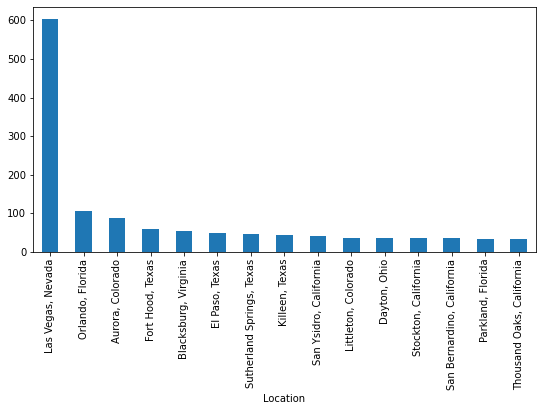

In [53]:
df2.groupby(['Location']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind = 'bar', figsize = (9,4.5))

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location.1', ylabel='count'>

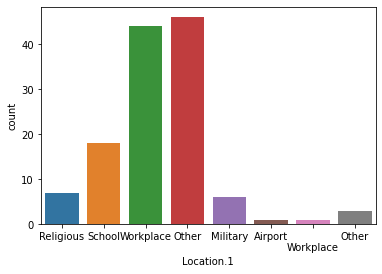

In [54]:
sns.countplot(df2['Location.1'])

In [55]:
df2.groupby(['Location.1']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Location.1
Other          1344
Workplace       420
School          394
Military        125
Religious       113
\nWorkplace      35
Other\n          21
Airport          11
Name: Total_victims, dtype: int64

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_of_shooter', ylabel='count'>

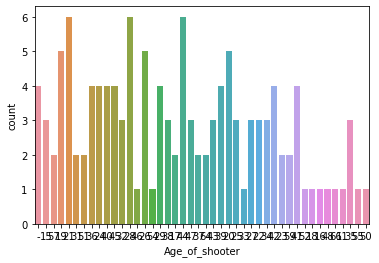

In [56]:
sns.countplot(df2['Age_of_shooter'])

<AxesSubplot:xlabel='Age_of_shooter'>

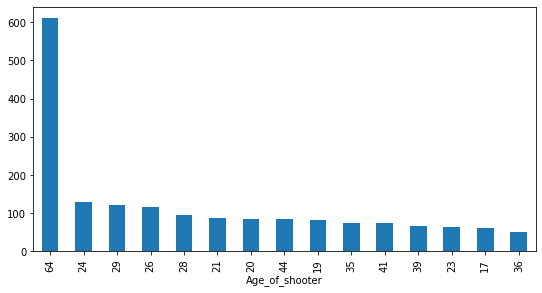

In [57]:
df2.groupby(['Age_of_shooter']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind = 'bar', figsize = (9,4.5))

In [58]:
df2.groupby(['Prior_signs_mental_health_issues']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Prior_signs_mental_health_issues
Yes         960
TBD         655
Unclear     349
-           205
No          201
yes          66
Unclear      21
Unknown       6
Name: Total_victims, dtype: int64

<AxesSubplot:xlabel='Prior_signs_mental_health_issues'>

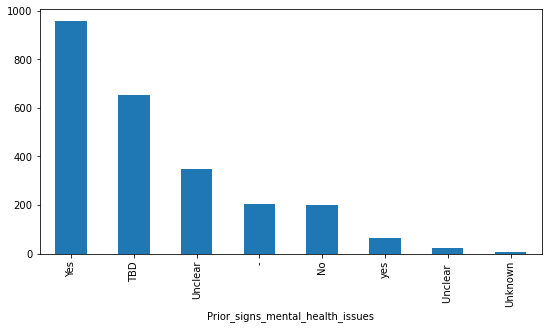

In [59]:
df2.groupby(['Prior_signs_mental_health_issues']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind = 'bar', figsize = (9,4.5))

In [60]:
df2.groupby(['Mental_health_details']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Mental_health_details
Perpetrator's history unclear. In 1969 Paddock's father was classified by the FBI as a dangerous psychopath with suicidal tendencies; psychopathy can be heritable (see Mother Jones sourcing).                                                                                                                                                                                           604
-                                                                                                                                                                                                                                                                                                                                                                                         304
Unclear                                                                                                                                                                                                               

In [61]:
df2.groupby(['Weapons_obtained_legally']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Weapons_obtained_legally
Yes                                                                                                                                    1924
No                                                                                                                                      223
-                                                                                                                                       100
\nYes                                                                                                                                    50
TBD                                                                                                                                      47
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI      46
Unknown                                                                                                                                

In [62]:
df2.groupby(['Where_obtained']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Where_obtained
Two gun shops in Nevada                                                                                            604
-                                                                                                                  352
Unknown                                                                                                            149
Shooting center in Port St. Lucie, Florida                                                                         102
Gander Mountain stores in Thornton and Aurora, Colo.; Bass Pro Shop in Denver, Colo.; BulkAmmo.com                  82
Purchased variously online and from Roanoke Firearms in Roanoke, Va.                                                55
Purchased in April 2016 from an Academy Sports & Outdoors store in San Antonio                                      46
Mike's Gun Shop in Henderson, Nev.                                                                                  44
Guns Galore in Kileen, Texas     

In [63]:
df2.groupby(['Weapon_type']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Weapon_type
23 firearms, mostly rifles; including scopes, and two modified for "fully automatic" firing; two were mounted on tripods                                                                                                                                                                                                                                                                                 604
semiautomatic rifle                                                                                                                                                                                                                                                                                                                                                                                      234
One semiautomatic handgun                                                                                                                                                                         

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

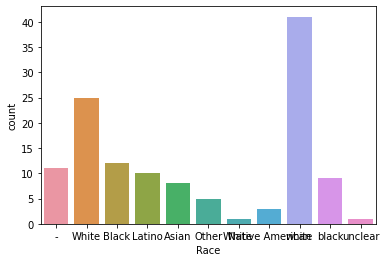

In [64]:
sns.countplot(df2['Race'])

In [65]:
df2.groupby(['Race']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Race
White              982
white              730
Other              206
Black              118
-                  113
Asian              110
black               91
Latino              77
Native American     27
unclear              6
White                3
Name: Total_victims, dtype: int64

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

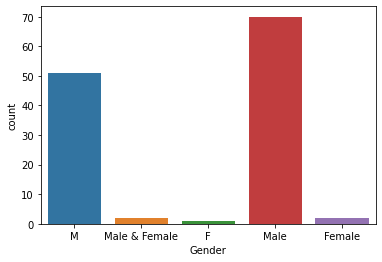

In [66]:
sns.countplot(df2['Gender'])

<AxesSubplot:xlabel='Gender'>

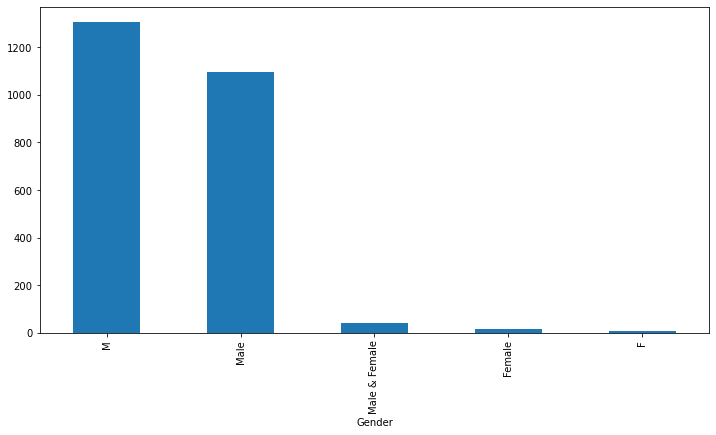

In [67]:
df2.groupby(['Gender']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind='bar',figsize = (12,6))

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

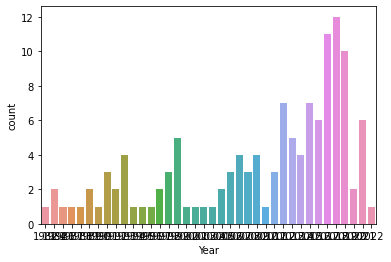

In [68]:
sns.countplot(df2['Year'])

<AxesSubplot:xlabel='Year'>

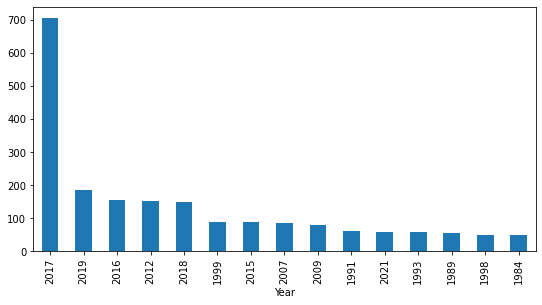

In [69]:
df2.groupby(['Year']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind = 'bar', figsize = (9,4.5))

<AxesSubplot:xlabel='Year'>

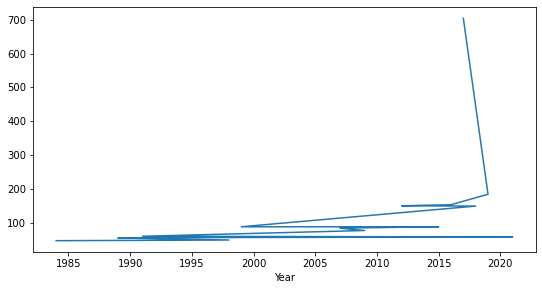

In [70]:
df2.groupby(['Year']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind = 'line', figsize = (9,4.5))

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

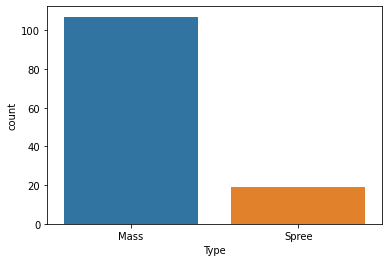

In [71]:
sns.countplot(df2['Type'])

In [72]:
df2.groupby(['Type']).sum()['Total_victims'].sort_values(ascending  = False) [:15]

Type
Mass     2185
Spree     278
Name: Total_victims, dtype: int64

<AxesSubplot:xlabel='Month'>

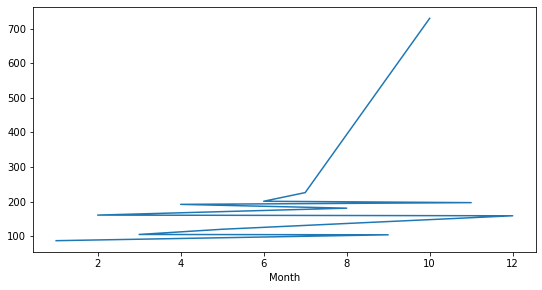

In [73]:
df2.groupby(['Month']).sum()['Total_victims'].sort_values(ascending  = False) [:15].plot(kind = 'line', figsize = (9,4.5))

In [74]:
df2.head(1)

,Case,Location,Date,Summary,Fatalities,Injured,Total_victims,Location.1,Age_of_shooter,Prior_signs_mental_health_issues,Mental_health_details,Weapons_obtained_legally,Where_obtained,Weapon_type,Weapon_details,Race,Gender,Latitude,Longitude,Type,Year,Month
0,Sacramento County church shooting,"Sacramento, California",2022-02-28,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,38.60111,-121.418966,Mass,2022,2


In [75]:
df2[['Location.1', 'Total_victims']]

,Location.1,Total_victims
0,Religious,4
1,School,11
2,Workplace,9
3,Workplace,15
4,Workplace,5
...,...,...
121,Other,20
122,Workplace,21
123,Other,41
124,Other,7


In [76]:
df_loc_t = df2[['Location.1', 'Total_victims']]

In [77]:
df_loc_t[df_loc_t['Location.1'] =='Workplace'].sort_values(by = 'Total_victims',ascending = False)[:10]

,Location.1,Total_victims
13,Workplace,48
98,Workplace,22
122,Workplace,21
118,Workplace,21
46,Workplace,17
15,Workplace,16
3,Workplace,15
92,Workplace,15
49,Workplace,12
16,Workplace,11


In [78]:
df_loc_t[df_loc_t['Location.1'] =='School'].sort_values(by = 'Total_victims',ascending = False)[:10]

,Location.1,Total_victims
84,School,55
99,School,37
119,School,35
29,School,34
64,School,29
100,School,29
80,School,26
26,School,23
56,School,19
51,School,18


In [79]:
df_loc_t[df_loc_t['Location.1'] =='Religious'].sort_values(by = 'Total_victims',ascending = False)[:10]

,Location.1,Total_victims
32,Religious,46
21,Religious,17
97,Religious,15
90,Religious,11
53,Religious,10
66,Religious,10
0,Religious,4


In [80]:
df2.pivot_table(index = 'Year', columns = 'Type', values = 'Total_victims').sort_values(by = 'Mass',ascending  =  False).round(0).fillna('-')

Type,Mass,Spree
Year,,
2017,69.0,15.0
2016,30.0,6.0
1989,28.0,-
1994,28.0,-
1991,27.0,7.0
1999,25.0,8.0
2007,24.0,13.0
1984,24.0,-
1986,21.0,-
